In [26]:
import numpy as np
import torch as torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch

In [38]:
N = 100

X1 = np.random.normal(loc = 1, scale = 1, size = (N, 2))
y1 = np.zeros((N,))
X2 = np.random.normal(loc = 3, scale = 1, size = (N, 2))
y2 = np.ones((N,))

X = np.concatenate((X1, X2), 0)
y = np.concatenate((y1, y2), 0)


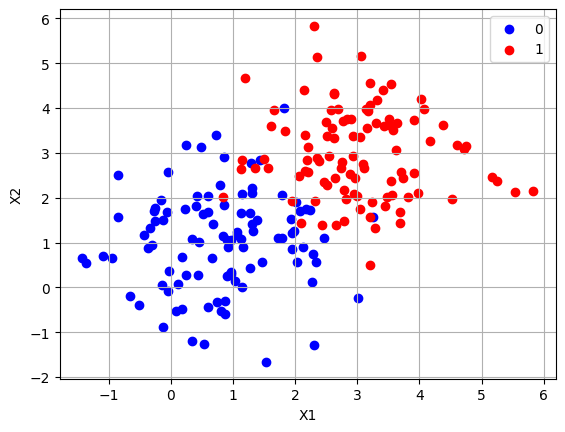

In [39]:
plt.scatter(X[y==0,0], X[y==0,1], c = 'blue', label = '0')
plt.scatter(X[y==1,0], X[y==1,1], c = 'red', label = '1')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend() ;

In [40]:
# tensor = generalization of an array 
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, train_size = 0.8)

X_train.shape, X_test.shape

(torch.Size([160, 2]), torch.Size([40, 2]))

In [42]:
class Linear(torch.nn.Module):
    def __init__(self, 
                 in_features, out_features, 
                 activation = None,
                 device = 'cpu', dtype = torch.float32):

        super(Linear, self).__init__()

        self.device, self.dtype = device, dtype

        self.in_features = in_features
        self.out_features = out_features
        self.activation = activation
        
        self.linear = torch.nn.Linear(in_features = in_features,
                                      out_features = out_features)
        
        self.activation_fn = torch.nn.Identity()
        if self.activation == 'softmax':
            self.activation_fn = torch.nn.Softmax(dim = 1)

    def forward(self, input):

        input = input.clone().to(self.device, self.dtype)
        
        output = self.activation_fn(self.linear(input))

        return output

In [43]:
model = Linear(2, 2, activation = 'softmax')
criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(lr = 0.1, params = model.parameters()) # lr = learning rate
      # Adam, ....
# pytorch_lightning

In [44]:
epochs = 3000

history = []
for epoch in range(epochs):
    
    # 1. Generate output prediction
    y_train_pred = model(X_train)
    
    # 2. Compute loss
    loss = criterion(y_train_pred, y_train.squeeze().long())

    history.append(loss.item())

    # 3. Backpropogation
    opt.zero_grad() # zero out the gradient
    loss.backward() # performs the backpropogation
    opt.step() # updates the parameters

history = np.stack(history)    

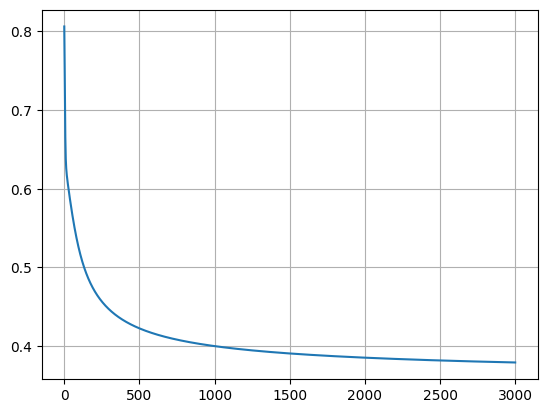

In [45]:
plt.plot(history)
plt.grid()

In [46]:
with torch.no_grad():
    y_train_pred = model(X_train).argmax(1)
    y_test_pred = model(X_test).argmax(1)

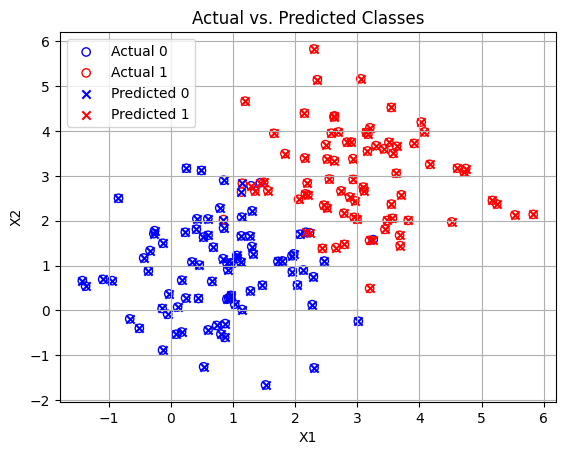

In [47]:
# Separate data points into actual class 0 and class 1
X1_train_0 = X_train[y_train == 0, 0]
X1_train_1 = X_train[y_train == 1, 0]

X2_train_0 = X_train[y_train == 0, 1]
X2_train_1 = X_train[y_train == 1, 1]

# Create scatter plot for actual classes
plt.scatter(X1_train_0, X2_train_0, label='Actual 0', edgecolors = 'blue', facecolors = 'none')
plt.scatter(X1_train_1, X2_train_1, label='Actual 1', edgecolors = 'red', facecolors = 'none')

# Create scatter plot for predicted classes
X1_train_pred_0 = X_train[y_train_pred == 0, 0]
X1_train_pred_1 = X_train[y_train_pred == 1, 0]

X2_train_pred_0 = X_train[y_train_pred == 0, 1]
X2_train_pred_1 = X_train[y_train_pred == 1, 1]

plt.scatter(X1_train_pred_0, X2_train_pred_0, label='Predicted 0', facecolors='blue', marker ='x')
plt.scatter(X1_train_pred_1, X2_train_pred_1, label='Predicted 1', facecolors='red', marker ='x')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Actual vs. Predicted Classes')
plt.grid()


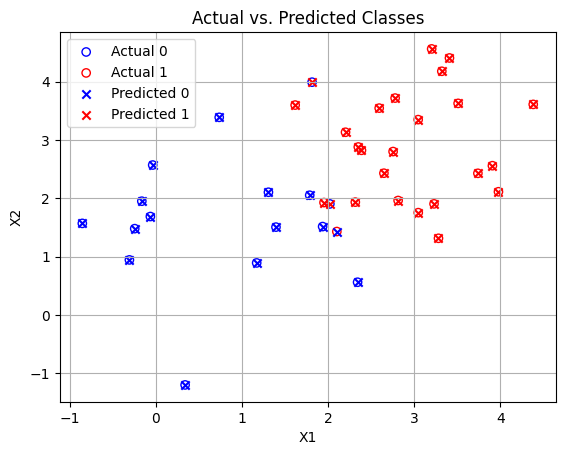

In [48]:
# Test data
X1_test_0 = X_test[y_test == 0, 0]
X1_test_1 = X_test[y_test == 1, 0]

X2_test_0 = X_test[y_test == 0, 1]
X2_test_1 = X_test[y_test == 1, 1]

# Create scatter plot for actual classes
plt.scatter(X1_test_0, X2_test_0, label='Actual 0', edgecolors = 'blue', facecolors = 'none')
plt.scatter(X1_test_1, X2_test_1, label='Actual 1', edgecolors = 'red', facecolors = 'none')

# Create scatter plot for predicted classes
X1_test_pred_0 = X_test[y_test_pred == 0, 0]
X1_test_pred_1 = X_test[y_test_pred == 1, 0]

X2_test_pred_0 = X_test[y_test_pred == 0, 1]
X2_test_pred_1 = X_test[y_test_pred == 1, 1]

plt.scatter(X1_test_pred_0, X2_test_pred_0, label='Predicted 0', facecolors='blue', marker ='x')
plt.scatter(X1_test_pred_1, X2_test_pred_1, label='Predicted 1', facecolors='red', marker ='x')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Actual vs. Predicted Classes')
plt.grid()


In [59]:
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print("Test Accuracy")
print(f"Test Accuracy = {accuracy_score_test:.2f}")
print()
print("Confusion Matrix")
print(cm_test)

Test Accuracy
Test Accuracy = 0.93

Confusion Matrix
[[14  2]
 [ 1 23]]
